# **Census Income Project**

**Problem Statement:**

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

**Description of the Dataset :**

**Input features:**

**Workclass** - Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

**Fnlwgt** - Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups

**Education** - Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

**Education_num**- number of class

**Marital_status** - Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

**Occupation** - Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

**Relationship** - Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

**Race** -- Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

**Sex - Values**: Female, Male

**Capital_gain** - how much during the time capital was gained

**Capital_loss** - how much during the time capital was lost

**Hours_per_week** - working hours per week

**Native_country** - Values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**Output_Features:** 

**Income_level** - Predictor class if individual earns greater or less than $50000 per year. Values: <=50K, >50K



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing all necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [3]:
#Reading the CSV file from the Census dataset

Cen = pd.read_csv("/content/drive/MyDrive/Python_Datasets/census_income.csv")

In [4]:
#Examining the Data
Cen

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# Display all columns and attrinutes of the Dataset
Cen.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
#Display top_5 rows of the Dataset
Cen.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
#Check all information of the Dataset
Cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Observation :** There are both numerical and categorical values present inside the Dataset . and Income is our target variable which has to be predicted .

In [8]:
# changing object type variables to desired categorical values 

cols = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

for column in cols:
  Cen[column] = Cen[column].astype('category')

In [9]:
Cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32560 non-null  int64   
 1   Workclass       32560 non-null  category
 2   Fnlwgt          32560 non-null  int64   
 3   Education       32560 non-null  category
 4   Education_num   32560 non-null  int64   
 5   Marital_status  32560 non-null  category
 6   Occupation      32560 non-null  category
 7   Relationship    32560 non-null  category
 8   Race            32560 non-null  category
 9   Sex             32560 non-null  category
 10  Capital_gain    32560 non-null  int64   
 11  Capital_loss    32560 non-null  int64   
 12  Hours_per_week  32560 non-null  int64   
 13  Native_country  32560 non-null  category
 14  Income          32560 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [10]:
#Check the Description about the Dataset
Cen.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Observation :**

1.We see that capital gain  and capital 
loss is 0 for all Data .

2.Data is centered to 40 hrs/week 

3.Most of the people have maximum education level .

4.Mean is just ahead of median of age , where range is between (17-90) and IQR is between (28-48).

In [11]:
# check for including all
Cen.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [12]:
# Shape of the Dataset 

Cen.shape

(32560, 15)

**Observation :** 
There are 32650 rows and 15 columns i.e, instances of Census present in the Dataset .

In [13]:
#Inspect all columns 

pd.options.display.max_columns =16
Cen.sample(15).transpose

<bound method DataFrame.transpose of        Age   Workclass  Fnlwgt      Education  Education_num  \
10012   70           ?   28471            9th              5   
26104   51     Private  124963      Bachelors             13   
28465   18     Private  151386        HS-grad              9   
27065   30     Private  275232     Assoc-acdm             12   
25392   39     Private  184128           11th              7   
3824    21     Private  177711        HS-grad              9   
17138   33     Private  209317            9th              5   
9597    50     Private  172942   Some-college             10   
3414    61     Private  231323   Some-college             10   
18450   70     Private  206232           10th              6   
9045    23     Private  522881        5th-6th              3   
10696   18   State-gov  342852        HS-grad              9   
18988   40           ?  507086        HS-grad              9   
11225   27   Local-gov   92431   Some-college             10   
133

In [14]:
#Checking for Null Values

Null_Values = Cen.isnull().sum().reset_index(name='Number of Null Values')
Null_Values


,index,Number of Null Values
0,Age,0
1,Workclass,0
2,Fnlwgt,0
3,Education,0
4,Education_num,0
5,Marital_status,0
6,Occupation,0
7,Relationship,0
8,Race,0
9,Sex,0


**Observation :**
There are no null values in the Dataset .

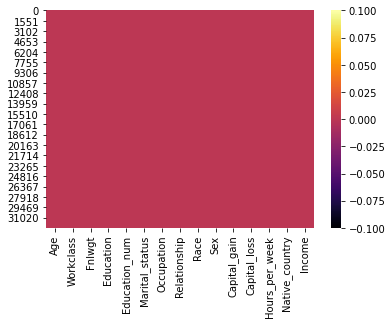

In [15]:
#Checking for Null Values by passing a HeatMap function

sns.heatmap(Cen.isnull(),cmap='inferno')

**Observation :** This a very clean Dataset .

In [16]:
#Checking all unique values in every column of the Dataset 
Cen.apply(lambda x: len(x.unique()))

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

**Observation :**
There are no useless features in the Dataset .

In [17]:
#Checking no. of unique values in Income attribute. 
Cen['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

**Observation :** 24719 peoples have their income under 50k whereas 7841 peoples have their income above 50k .

# **EDA(Exploratory_Data_Analysis)**

**1.Univariant_Analysis**

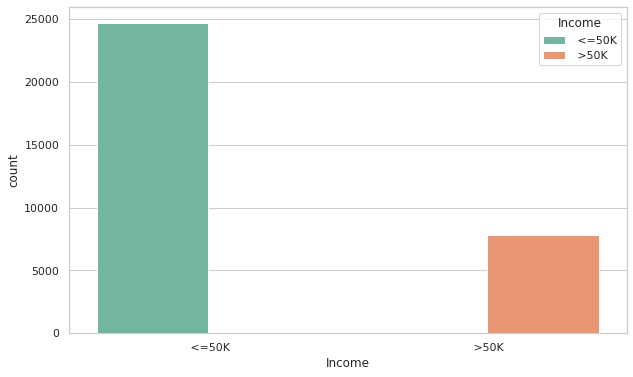

In [18]:
# Plotting Age Distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='Income',data=Cen,hue='Income',saturation=.75,palette='Set2')
plt.show()

**Observation :**
Clearly there is a class imbalance problem as most of the employees have their income less than 50k .

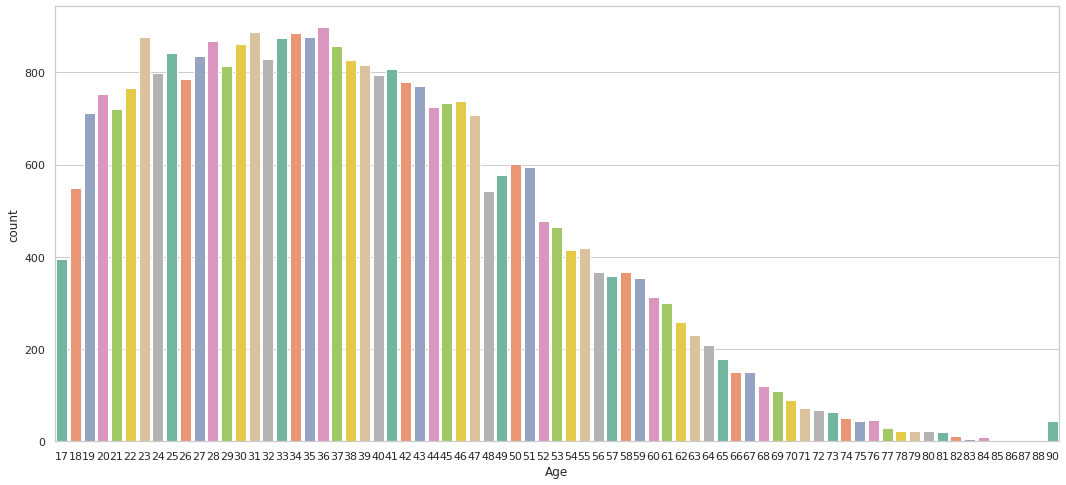

In [19]:
# Plotting Age Distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18,8))
sns.countplot(x='Age',data=Cen,saturation=.75,palette='Set2')
plt.show()

**Observation :** 
Looks like most of the Employees have their age in range between 20 - 50 years

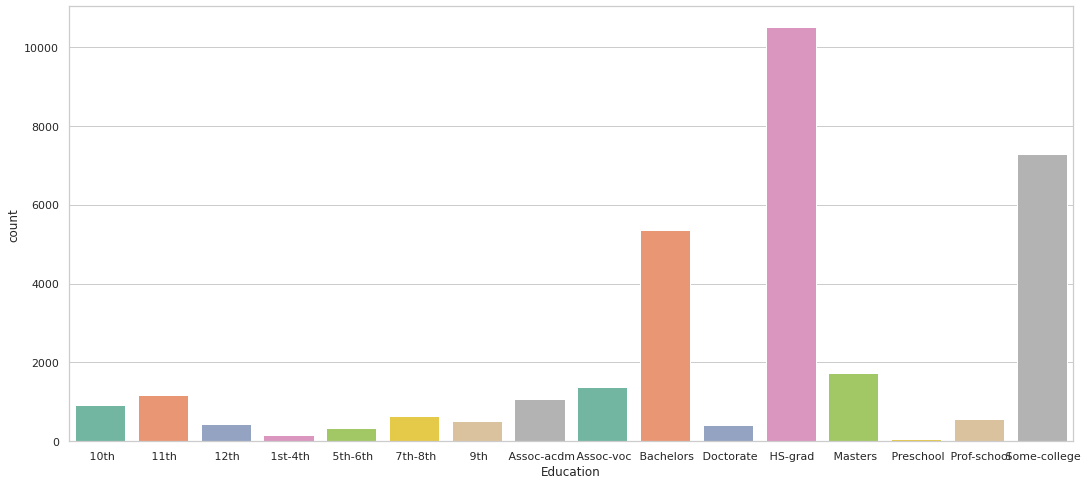

In [20]:
#Plotting Education_num distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18,8))
sns.countplot(x='Education',data=Cen,saturation=0.75,palette="Set2")
plt.show()

**Observation :** Most of the employees have their educational background as HS-grad and least number of employees have Preschool .

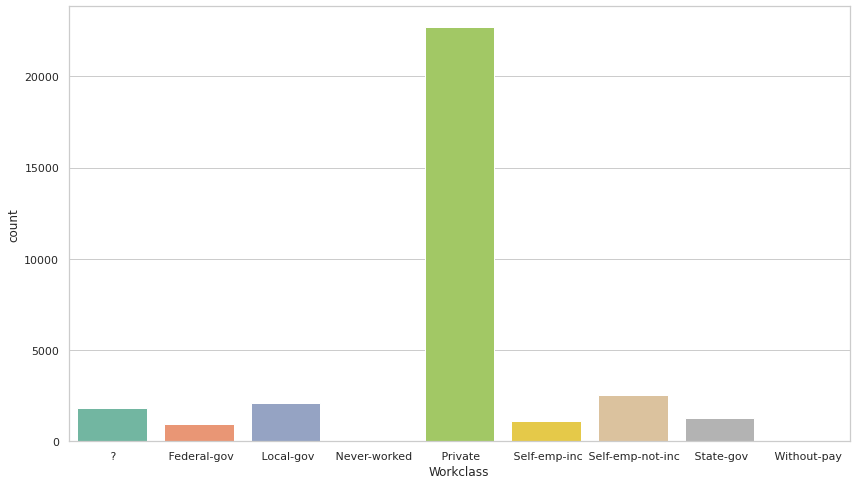

In [21]:
#Plotting Workclass distribution 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,8))
sns.countplot(x='Workclass',data=Cen,saturation=0.75,palette="Set2")
plt.show()

**Observation :** Most of the Employees have Private type as their workclass .

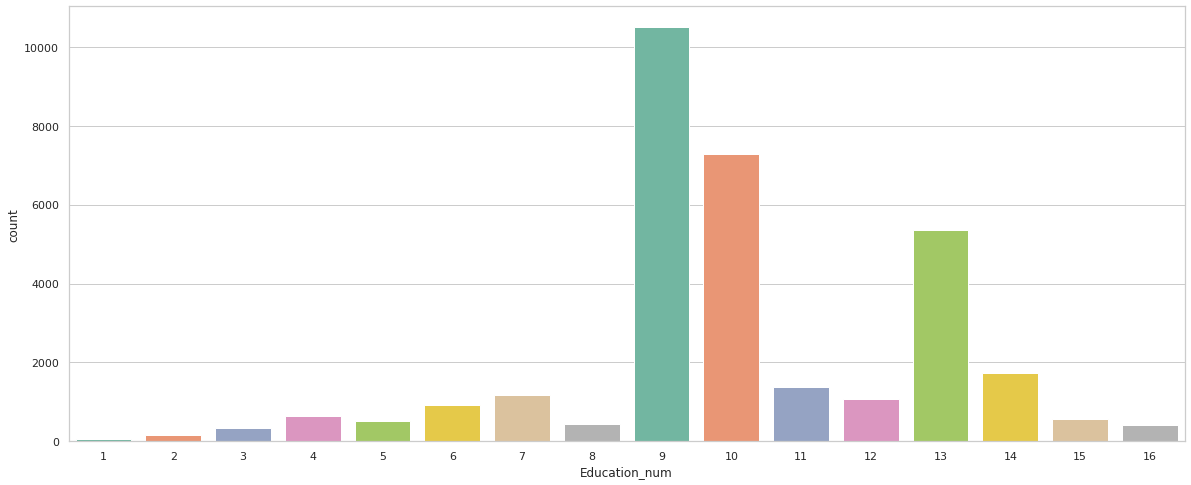

In [22]:
#Plotting Education Distribution  

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,8))
sns.countplot(x='Education_num',data=Cen,saturation=0.75,palette="Set2")
plt.show()

**Observation :**
Here 9 refers to HS_grad as educational backgroung which is the most in numbers .

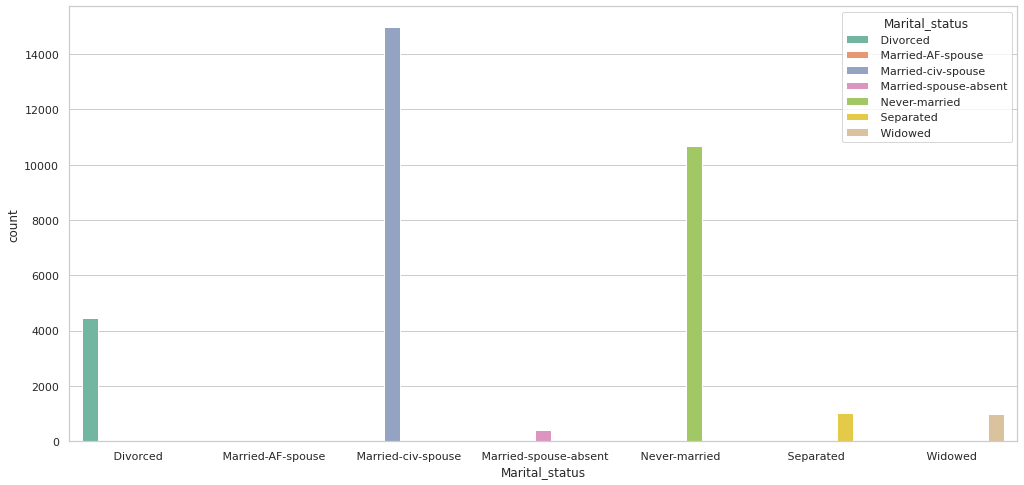

In [23]:
#Plotting Marital_Status Distribution  

sns.set_theme(style="whitegrid")
plt.figure(figsize=(17,8))
sns.countplot(x='Marital_status',data=Cen,hue='Marital_status',saturation=0.75,palette="Set2")
plt.show()

**Observation :** Most of the Employees comes under Married-civ-spouse category and least have Married-Af-spouse 

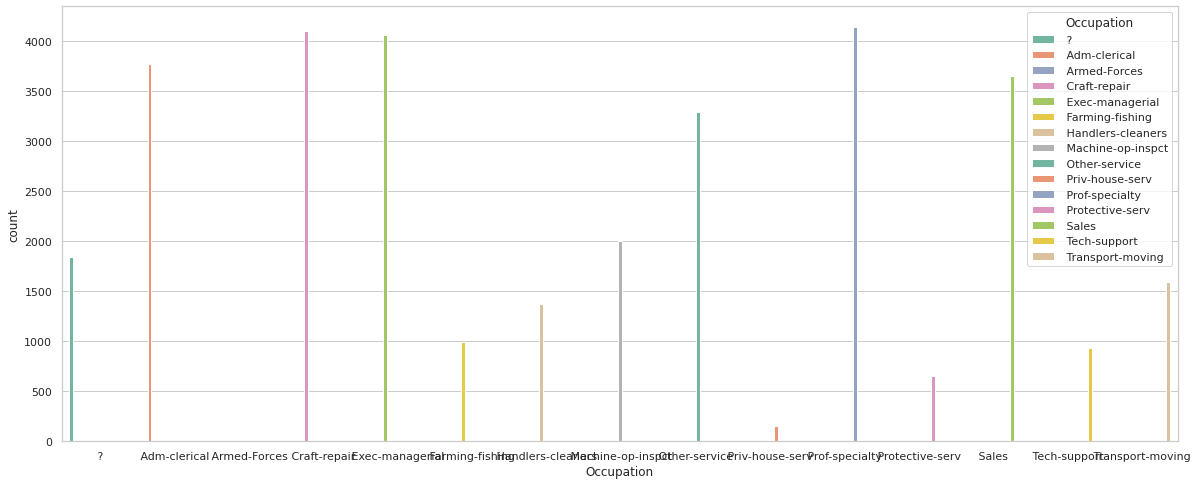

In [24]:
#Plotting Occupation Distribution  

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,8))
sns.countplot(x='Occupation',data=Cen,hue='Occupation',saturation=0.75,palette="Set2")
plt.show()

**Observation :**
Most of the person have their occupation as Prof-speciality .

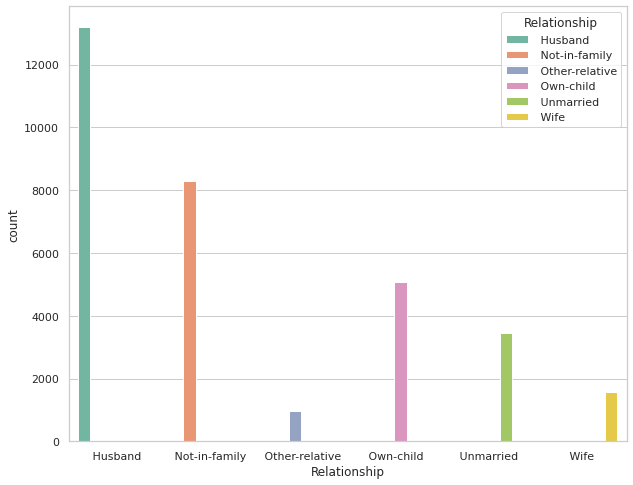

In [25]:
#Plotting Relationship Distribution  

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sns.countplot(x='Relationship',data=Cen,hue='Relationship',saturation=0.75,palette="Set2")
plt.show()

**Observation :**
Most people are Husband in relation and Least people are other - relative .

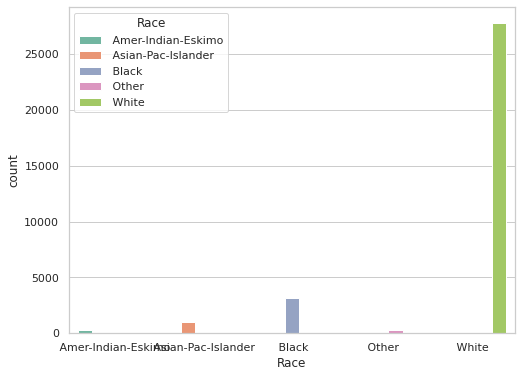

In [26]:
#Plotting Race Distribution  

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(x='Race',data=Cen,hue='Race',saturation=0.75,palette="Set2")
plt.show()

**Observation :**
Most peoples are white in colur and least are in other category .

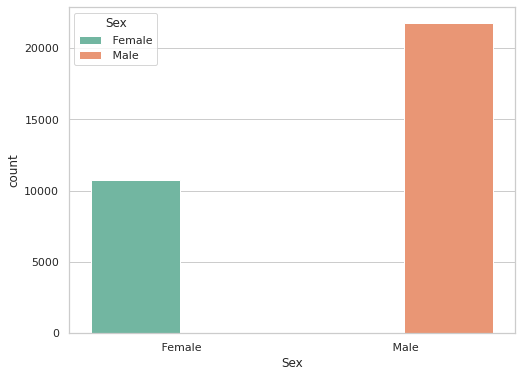

In [27]:
#Plotting Sex Distribution  

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(x='Sex',data=Cen,hue='Sex',saturation=0.75,palette="Set2")
plt.show()

Most of the peoples are male .

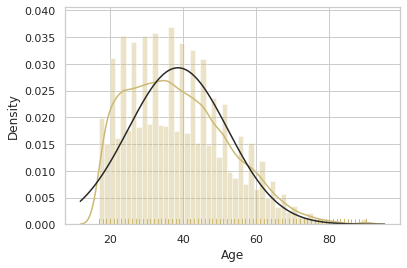

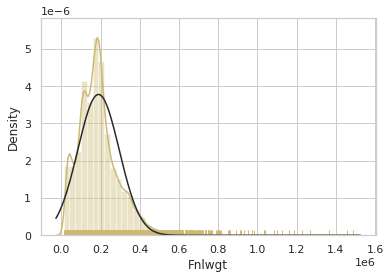

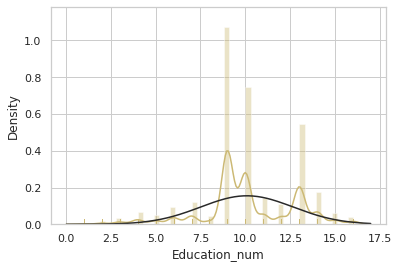

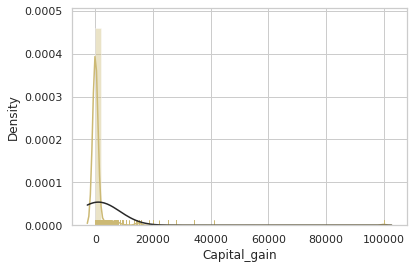

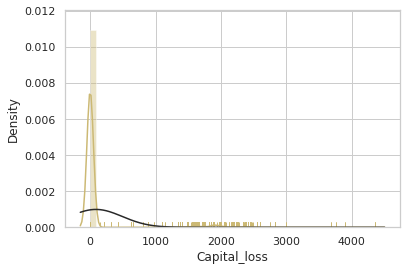

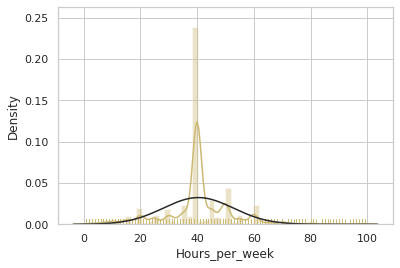

In [28]:
COL = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
from scipy.stats import norm
for i in COL:
  sns.distplot(Cen[i], rug=True,color='y',fit=norm)
  plt.show()

**Observation :**

1.For Capital Gain and Capital Loss the data is highly left skewed which needs to be tackled.

2.We need to analyse Education Number further as it might align with Education information.

3.Final Weight is also left skewed.

4.The Hours per Week can also be split into bins.

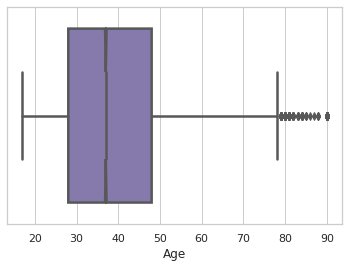

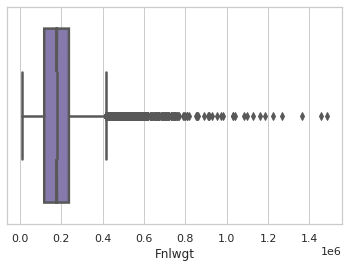

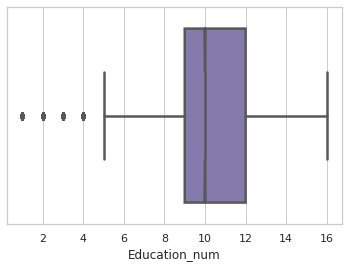

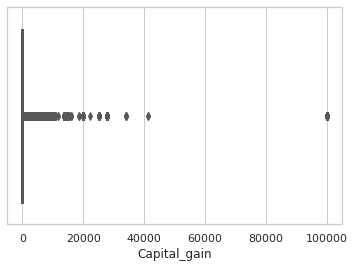

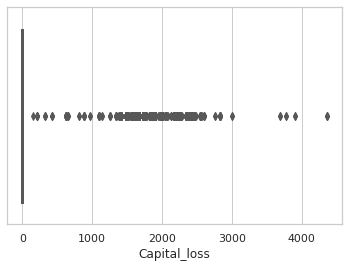

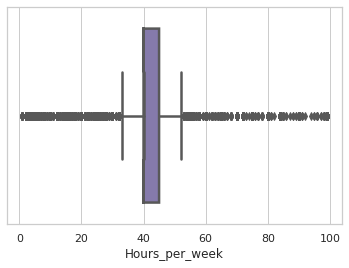

In [29]:
COL = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

for i in COL:
  sns.boxplot(Cen[i], notch=True,color='m',linewidth=2.5)
  plt.show()

**Observation :**
There are outliers present in almost all columns .

**2.Bivariant Analysis**

Lets check relationship between all feature attributes and target variable.

Text(0.5, 1.0, 'Income controlled by Age and Gender')

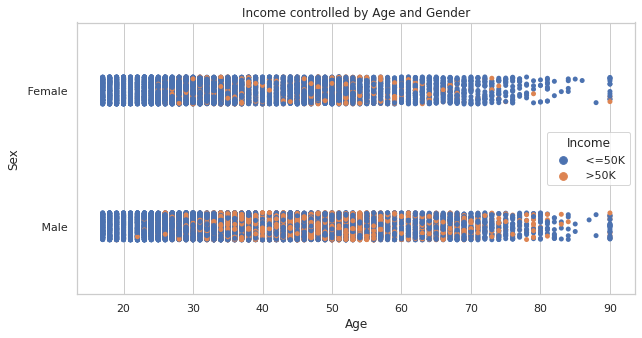

In [30]:
plt.figure(figsize=(10,5))
ax = sns.stripplot(x='Age', y='Sex', data=Cen,hue='Income')
ax.set_title('Income controlled by Age and Gender')

**Observation :**
Male people have income more  than 50k and in are age in range of 30-60

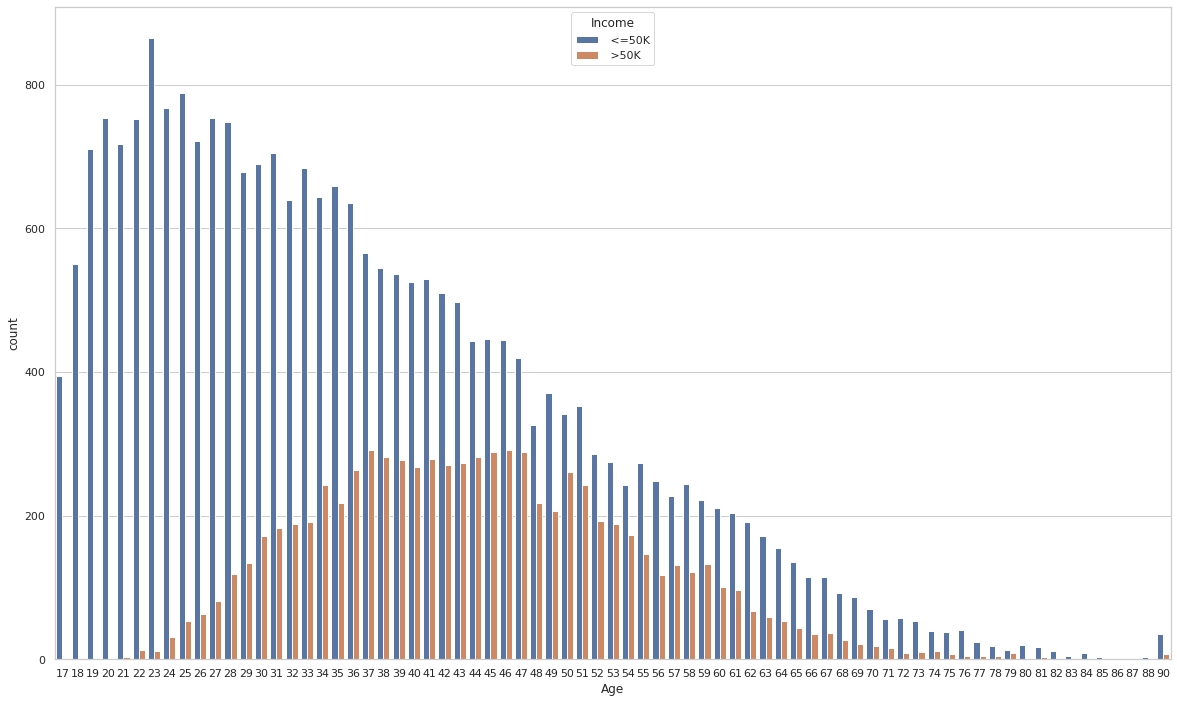

In [31]:
#Plotting relation between Age and Income

plt.figure(figsize = (20,12))
sns.countplot(Cen['Age'],hue=Cen.Income)

**Observation :**
It appears that there are relatively less Young people who have an income more than $50K.

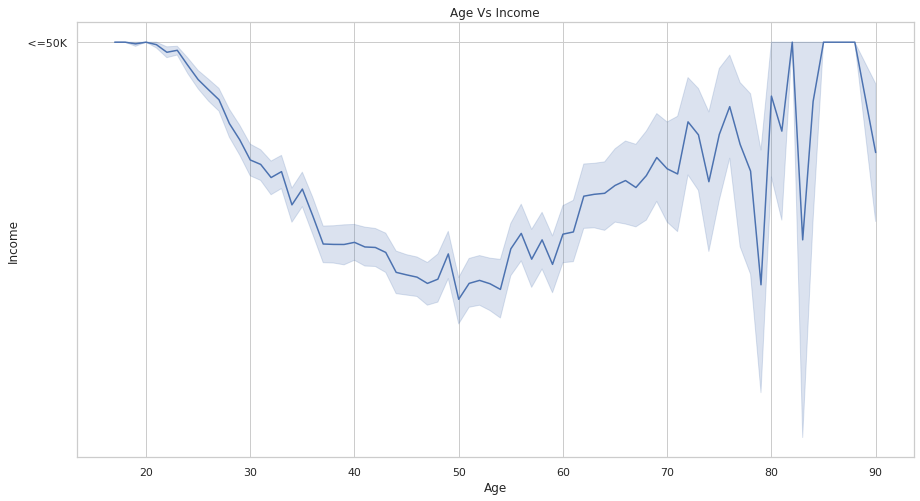

In [32]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'Age', y = 'Income', data=Cen)
plt.title('Age Vs Income')
plt.show()

In [33]:
pip install bubble_plot

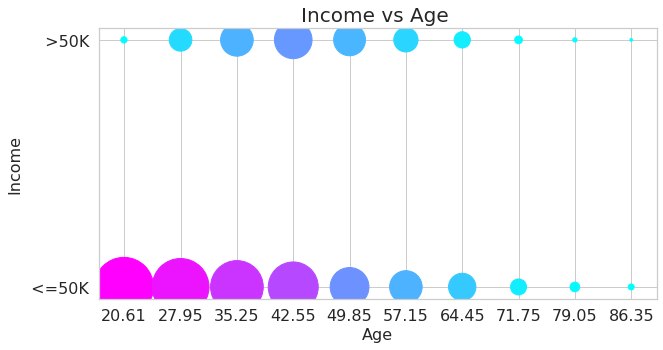

In [34]:
from bubble_plot.bubble_plot import bubble_plot
bubble_plot(Cen,'Age','Income', normalization_by_all=True)

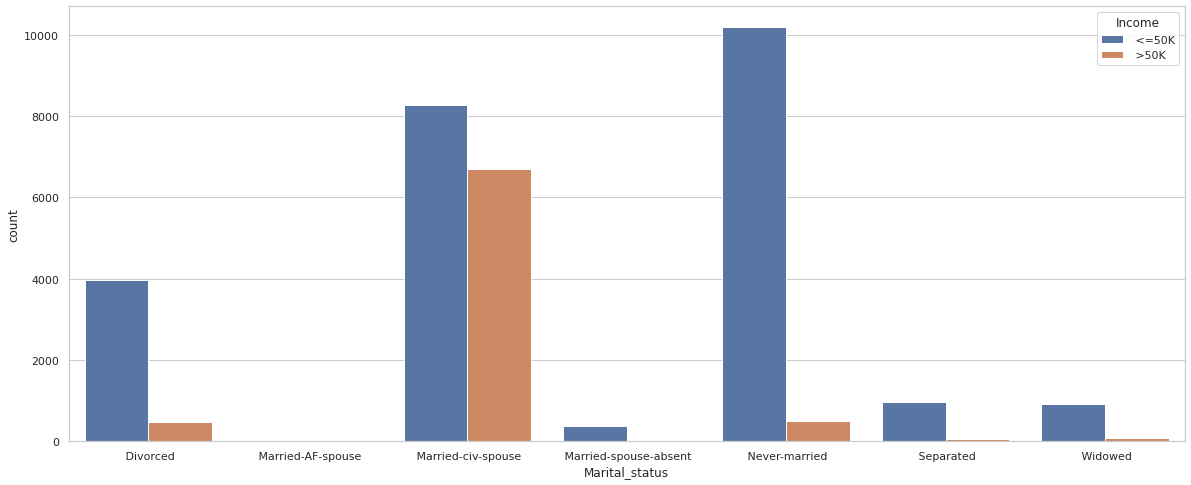

In [35]:
#Checking Relation between Marital_Status and Income
plt.figure(figsize=(20,8))
sns.countplot(Cen['Marital_status'],hue=Cen.Income)

**Observation :**
Never married have the highest under 50k income and Married-civ-spouse have highest above 50k income .

In [36]:
Cen['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

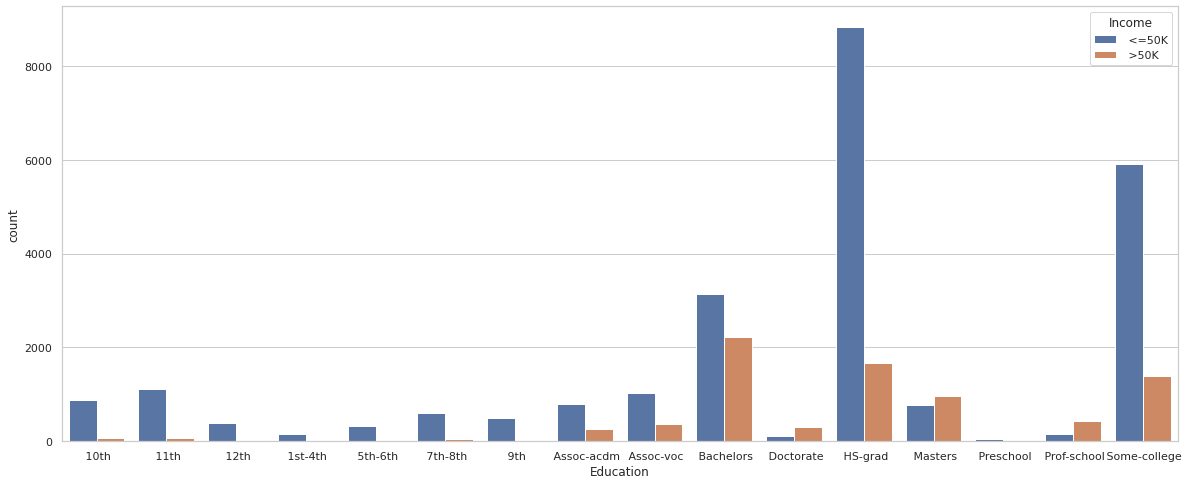

In [37]:
#Checking Relation between Education and Income
plt.figure(figsize=(20,8))
sns.countplot(Cen['Education'],hue=Cen.Income)

**Observation:**
From the analysis above, I discovered that Education Number and Education are just the same. So, I can drop any one column. Also, I'll combine all information from Preschool to 12th as they can be considered of one class who have no college/university level education.

In [38]:
Cen['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

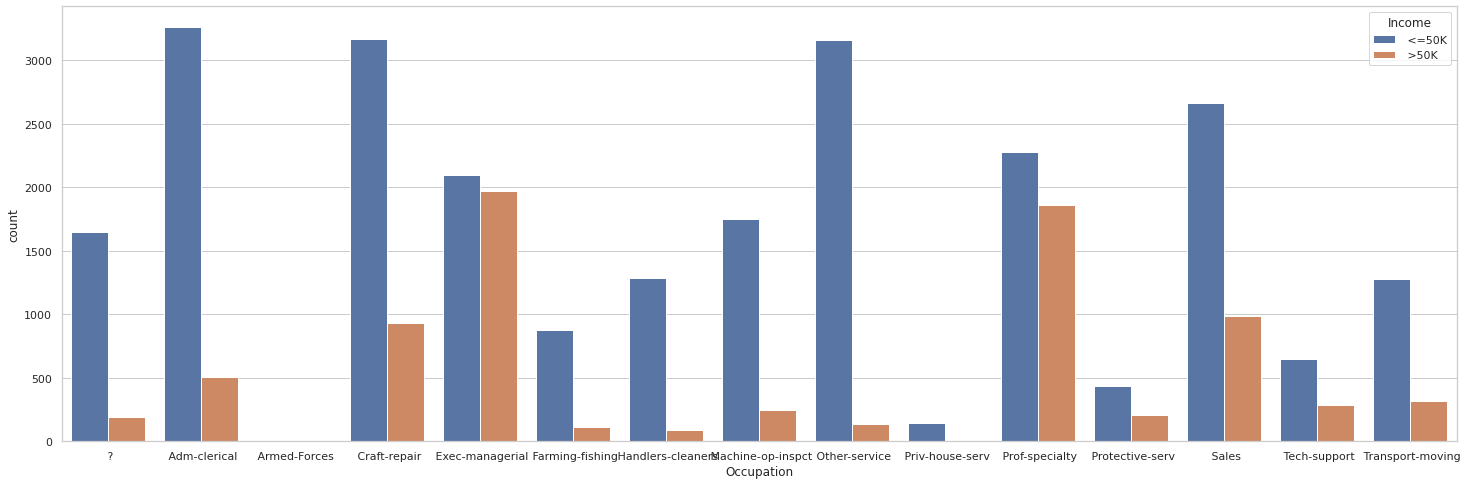

In [39]:
#Checking Relation between Occupation and Income
plt.figure(figsize=(25,8))
sns.countplot(Cen['Occupation'],hue=Cen.Income)

The categories have already been uniquely defined and we can keep it as is.

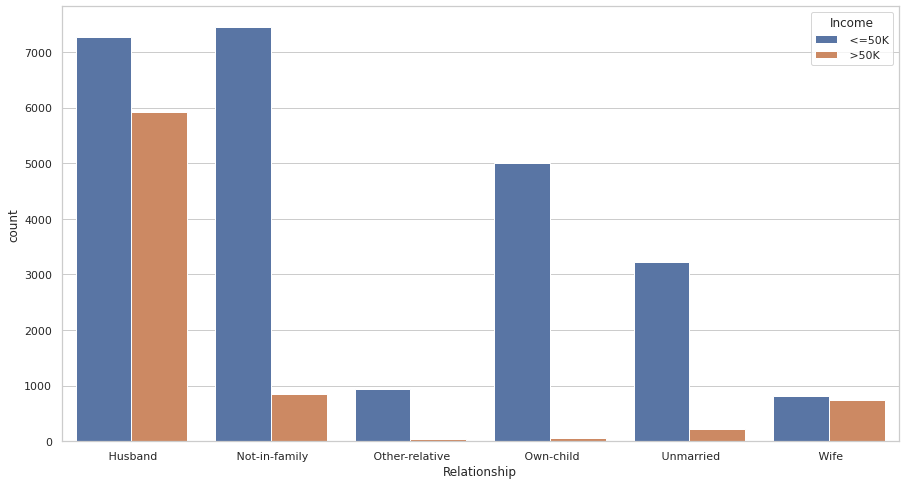

In [40]:
#Checking Relation between Relationship and Income
plt.figure(figsize=(15,8))
sns.countplot(Cen['Relationship'],hue=Cen.Income)

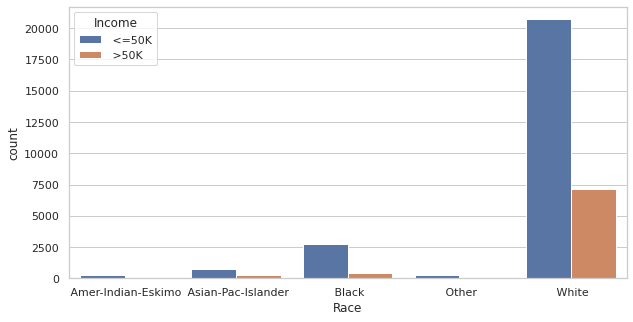

In [41]:
#Checking Relation between Race and Income
plt.figure(figsize=(10,5))
sns.countplot(Cen['Race'],hue=Cen.Income)

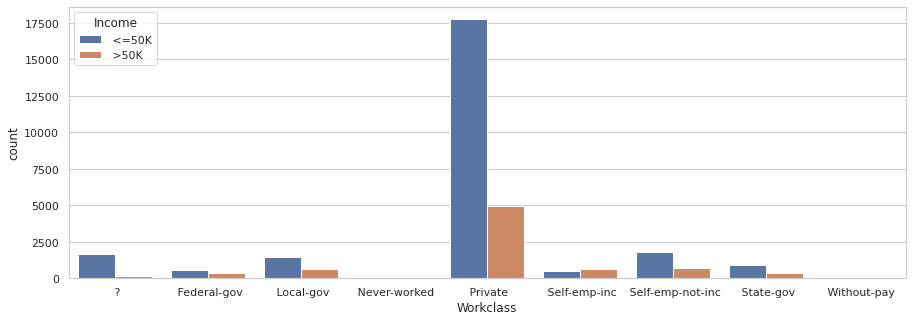

In [42]:
#Checking Relation between Workclass and Income
plt.figure(figsize=(15,5))
sns.countplot(x = 'Workclass', hue = 'Income', data = Cen)

**Observation :**
Taking a look at the plot above, I can see that there are Work Class values defined as ? which appears to be error data. As it is very less, I'll simply remove these records. Also, the two values Without-pay and Never-worked are negligible and hence it is safe to drop them too.

In [43]:
Cen = Cen.drop(Cen[Cen['Workclass'] == ' ?'].index)
Cen = Cen.drop(Cen[Cen['Workclass'] == ' Without-pay'].index)
Cen = Cen.drop(Cen[Cen['Workclass'] == ' Never-worked'].index)

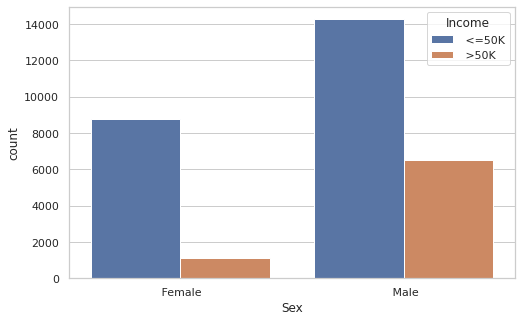

In [44]:
#Checking Relation between Sex and Income
plt.figure(figsize=(8,5))
sns.countplot(Cen['Sex'],hue=Cen.Income)

**From the plot above**, it is clear that

There are more Male participants than Female participants
When we compare the two genders and the corresponding income distribution, more percentage of Males have an Income of more than \$50K than Females.

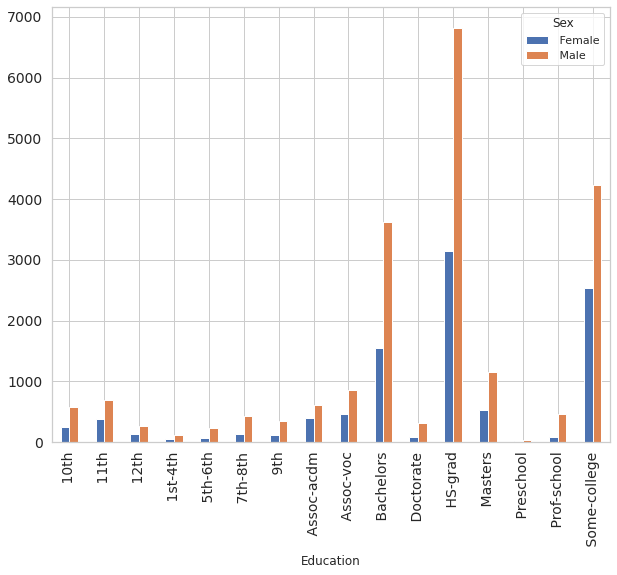

In [45]:
#Gender distribution based on education levels
Cen.groupby(["Education","Sex"]).size().unstack("Sex").plot(kind="bar",fontsize=14,figsize=(10, 8))

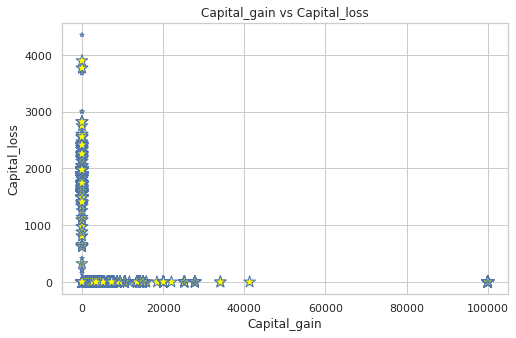

In [46]:
#Scatter_plot showing relation between Capital_gain and Capital_loss

plt.figure(figsize=(8,5))
plt.title('Capital_gain vs Capital_loss')
plt.scatter(x='Capital_gain',y='Capital_loss',data=Cen,sizes=(20, 150),edgecolors='b',c='yellow',marker ="*")
plt.xlabel("Capital_gain")
plt.ylabel("Capital_loss")
plt.show()

**Observation :**
On taking a look at the result, I can see that the for Minor there are more people with Income less than 50K and for Major there are more people with Income greater than 50K. This is in complete agreement with the fact that people who have large Capital Gain compared to Capital Loss have Income more than $50K.

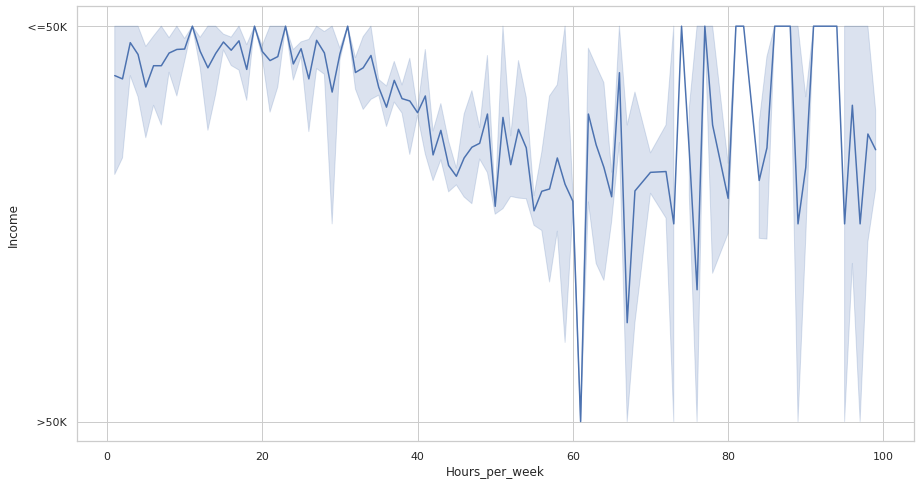

In [47]:
#Relation between Hours_per_week vs Income
plt.figure(figsize=(15,8))
sns.lineplot(x = 'Hours_per_week', y = 'Income', data=Cen)
plt.show()

**Observation :**
Taking a look at the plot above, we can see a trend. As the number of hours increase, the number of people earning more than $50K increases in comparison to the people earning less.

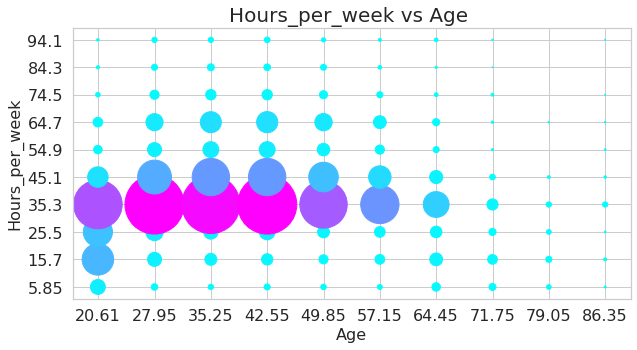

In [48]:
bubble_plot(Cen,'Age','Hours_per_week', normalization_by_all=True)

In [49]:
Cen['Native_country'].value_counts()

 United-States                 27490
 Mexico                          610
 ?                               556
 Philippines                     187
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Iran                             42
 Taiwan                           42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

**Performing Label Encoder**

In [50]:
# Performing Label Encoder for categorical Values.

from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
Cen['Workclass'] = Le.fit_transform(Cen['Workclass'])
Cen['Education'] = Le.fit_transform(Cen['Education'])
Cen['Marital_status'] = Le.fit_transform(Cen['Marital_status'])
Cen['Occupation'] = Le.fit_transform(Cen['Occupation'])
Cen['Relationship'] = Le.fit_transform(Cen['Relationship'])
Cen['Race'] = Le.fit_transform(Cen['Race'])
Cen['Sex'] = Le.fit_transform(Cen['Sex'])
Cen['Native_country'] = Le.fit_transform(Cen['Native_country'])
Cen['Income'] = Le.fit_transform(Cen['Income'])

In [51]:
Cen.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,39,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,39,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,39,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,5,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,39,0


**Multi-Variant Analysis**

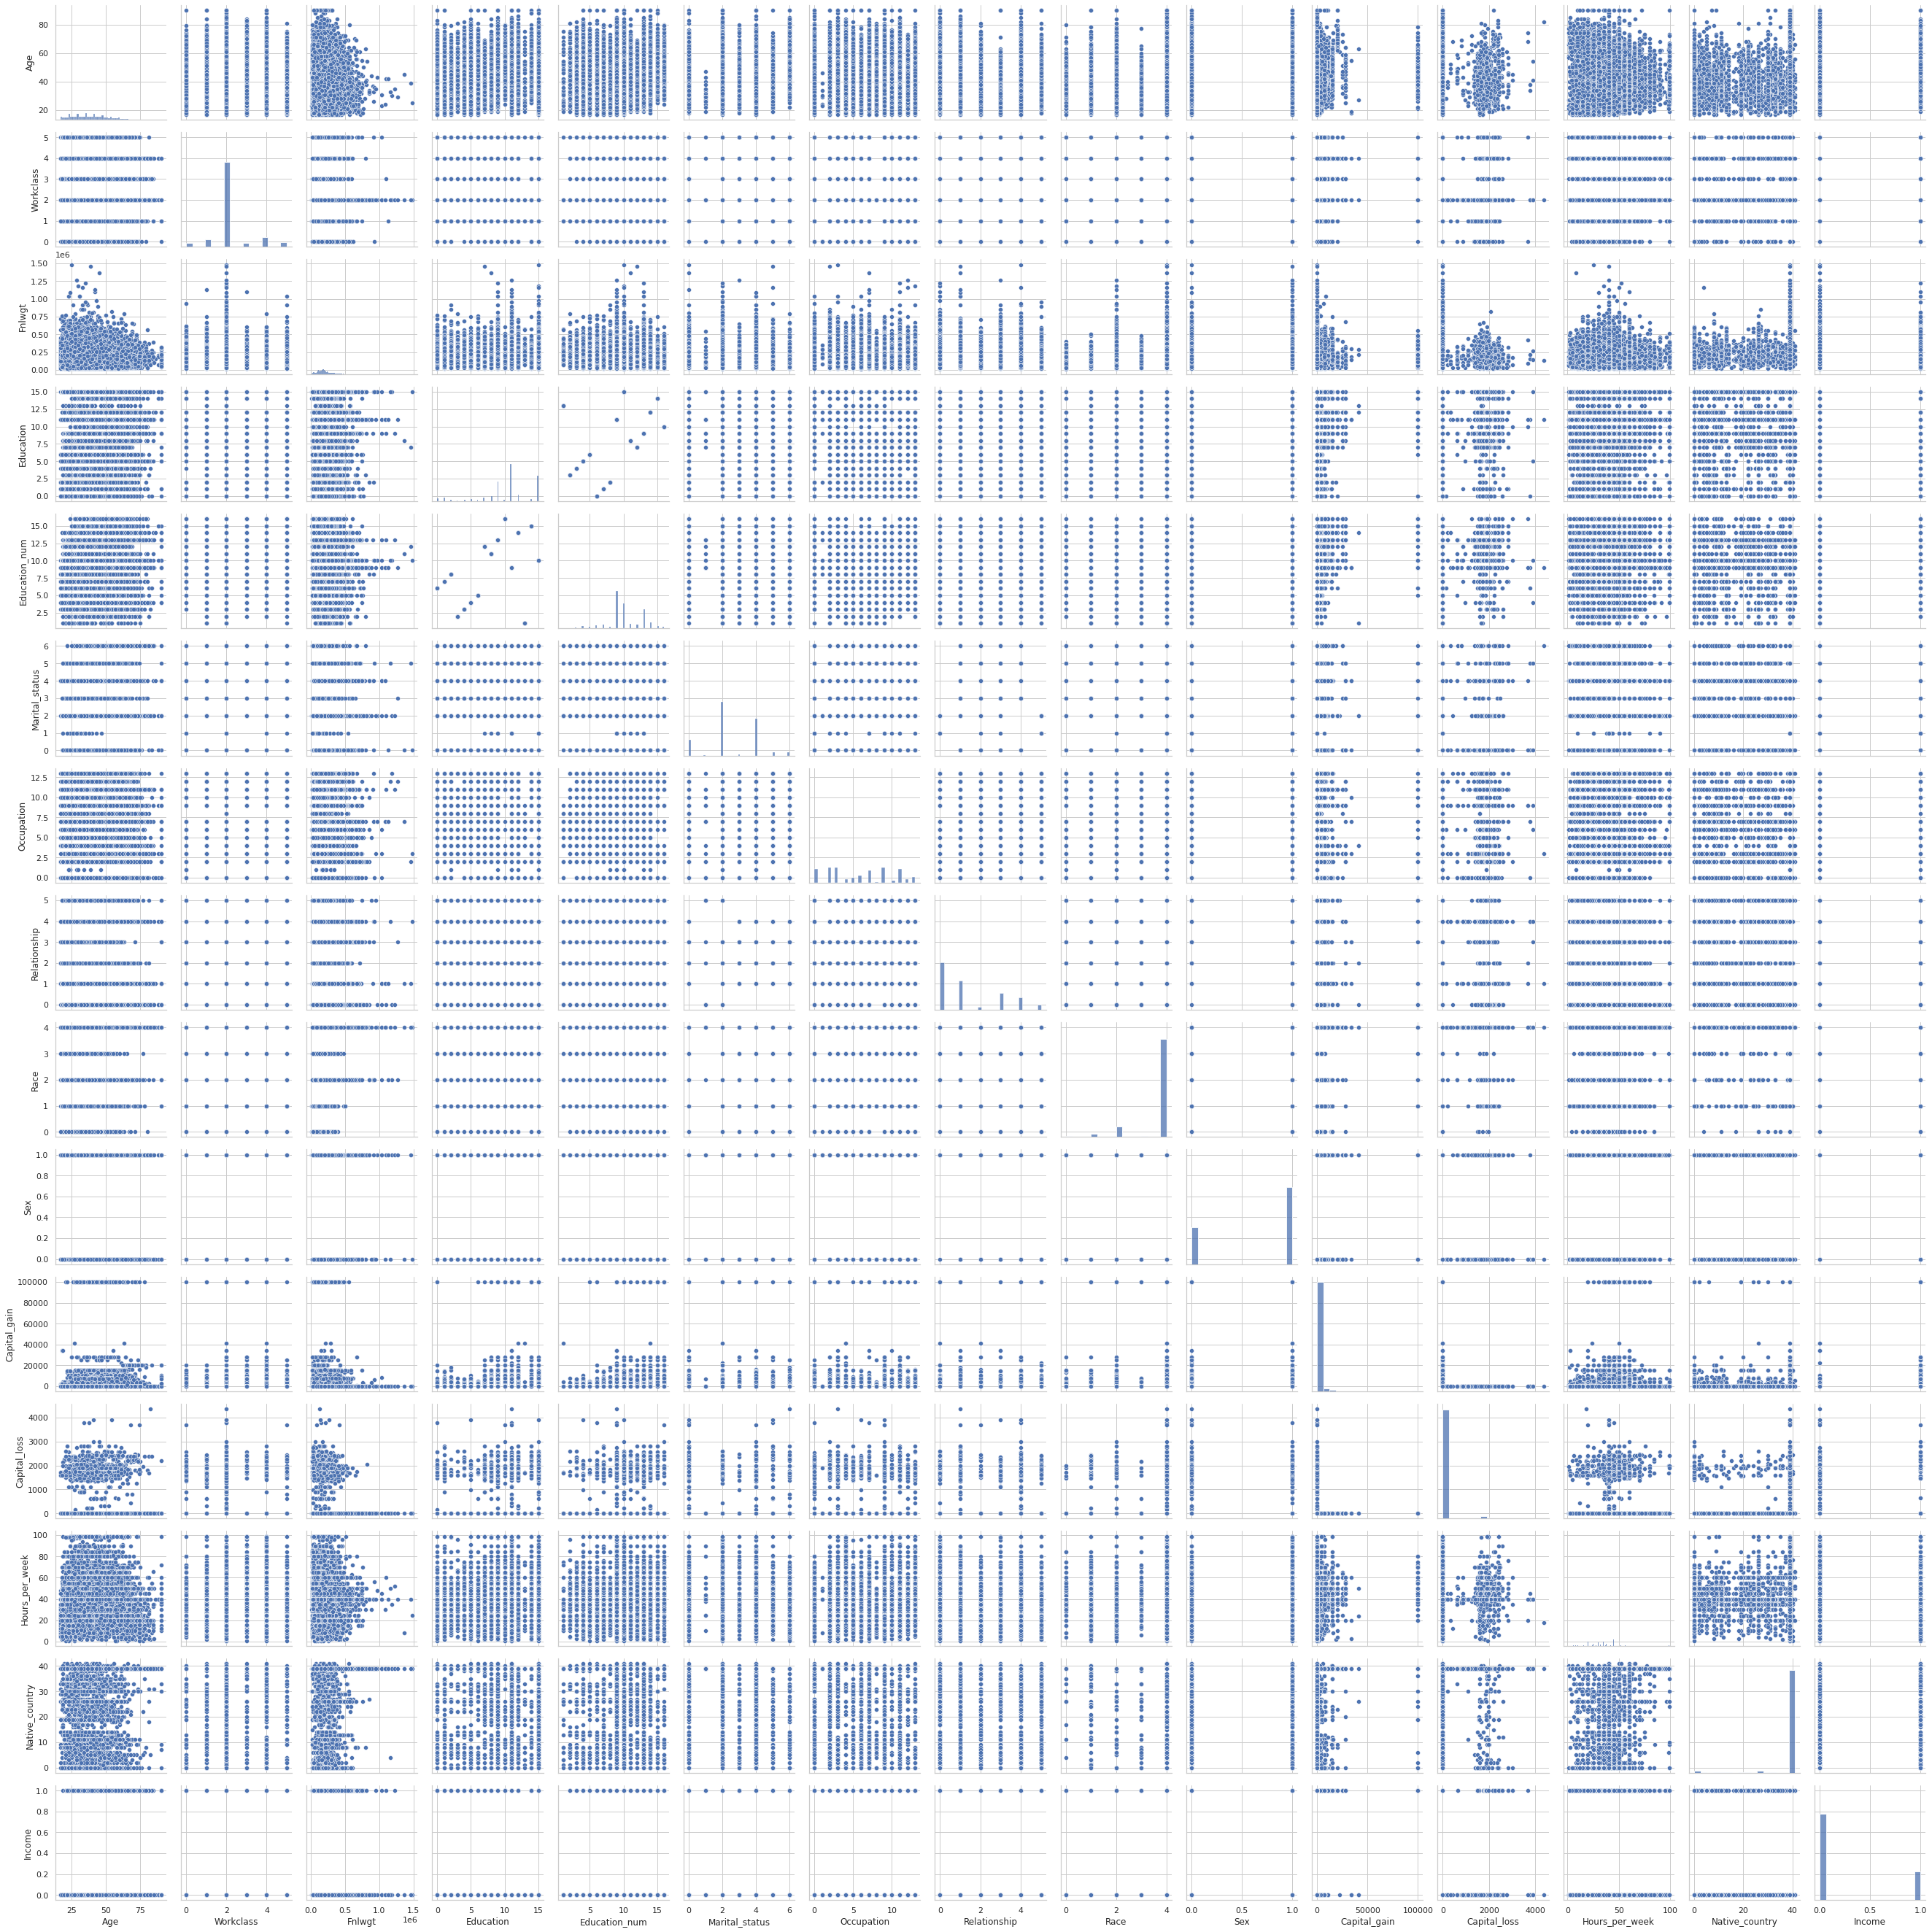

In [52]:
sns.pairplot(Cen)

In [53]:
#Checking Correlation between Attributes

cor = Cen.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.080102,-0.076285,-0.002263,0.043762,-0.276884,-0.005950,-0.246339,0.025264,0.082501,0.080497,0.060521,0.102205,-0.003503,0.242799
Workclass,0.080102,1.000000,-0.031996,0.016893,0.039121,-0.035795,0.016115,-0.068678,0.043568,0.075470,0.034706,0.008800,0.051662,0.003525,0.020309
Fnlwgt,-0.076285,-0.031996,1.000000,-0.026770,-0.043602,0.031789,0.000603,0.007989,-0.023427,0.026487,-0.000213,-0.010035,-0.022896,-0.053416,-0.009507
Education,-0.002263,0.016893,-0.026770,1.000000,0.345811,-0.040490,-0.037805,-0.012492,0.011297,-0.028127,0.029787,0.015109,0.059028,0.066642,0.078321
Education_num,0.043762,0.039121,-0.043602,0.345811,1.000000,-0.063705,0.089118,-0.092054,0.029809,0.007316,0.124247,0.079300,0.151249,0.053267,0.334630
Marital_status,-0.276884,-0.035795,0.031789,-0.040490,-0.063705,1.000000,0.022495,0.179060,-0.067891,-0.120409,-0.043005,-0.035585,-0.186868,-0.029325,-0.194554
Occupation,-0.005950,0.016115,0.000603,-0.037805,0.089118,0.022495,1.000000,-0.052695,-0.001395,0.062006,0.021385,0.012986,0.018098,-0.011067,0.050009
Relationship,-0.246339,-0.068678,0.007989,-0.012492,-0.092054,0.179060,-0.052695,1.000000,-0.115628,-0.585765,-0.056734,-0.062531,-0.257188,-0.005209,-0.251183
Race,0.025264,0.043568,-0.023427,0.011297,0.029809,-0.067891,-0.001395,-0.115628,1.000000,0.086328,0.011513,0.020970,0.044684,0.140934,0.070950
Sex,0.082501,0.075470,0.026487,-0.028127,0.007316,-0.120409,0.062006,-0.585765,0.086328,1.000000,0.047741,0.047020,0.230383,-0.010035,0.216691


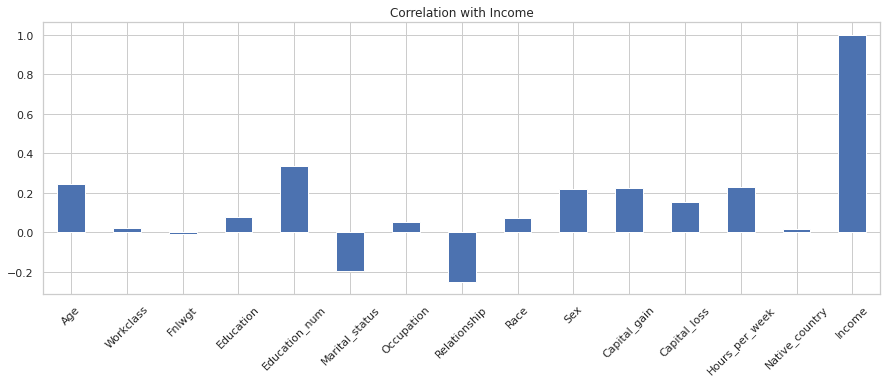

In [54]:
#Correlation of Income with other attributes

Cen.corrwith(Cen.Income).plot.bar(figsize=(15,5),title = 'Correlation with Income',rot=45,grid=True)

**Observation :**

1.Age,Workclass,Education,Education_num,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week have positive correlation with Income .

2.FinalWeight , Marital_status , Relationship have negative correlation with income .

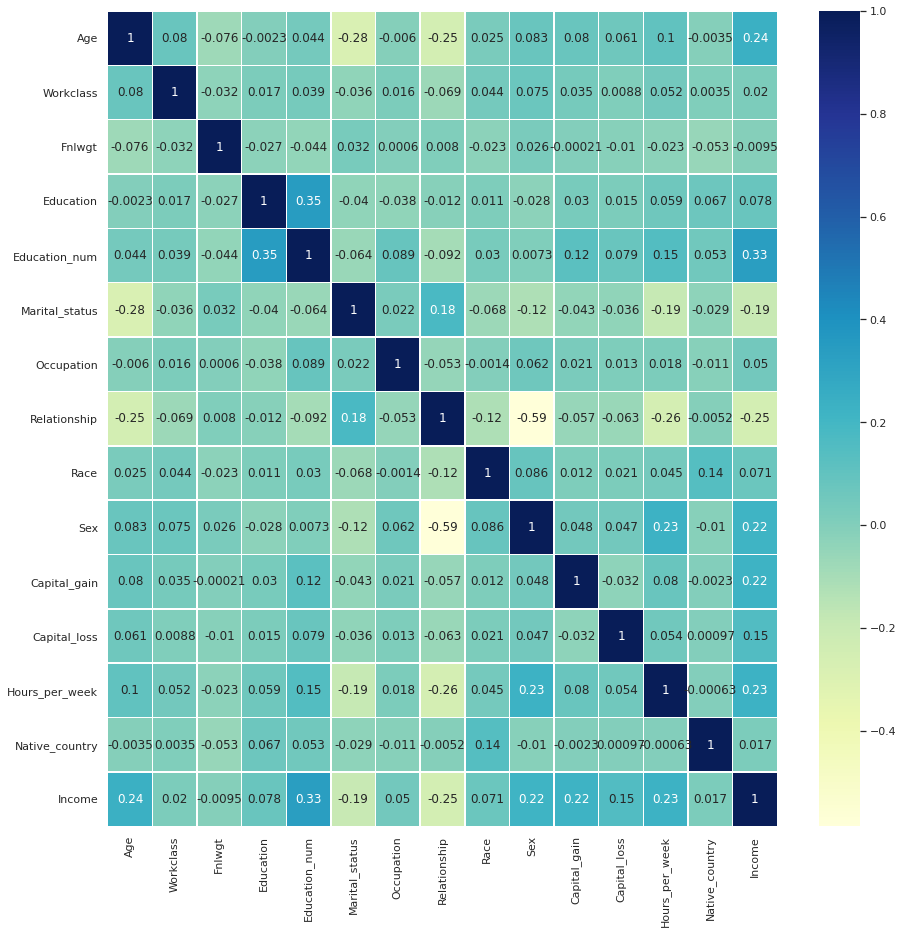

In [55]:
# Plotting Heatmap to show Correlation between Variables

plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,linewidths=.5,cmap="YlGnBu")
plt.show()

**Observation :**

Taking a look at the correlation matrix above, it's clear that there is not a very high linear correlation between any of the continuous features and the target variable. Also, Final Weight has zero correlation with the output class and hence, I'll drop this column later.

# **Data Cleaning**

**1.Checking Null Values**

In [56]:
Cen.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

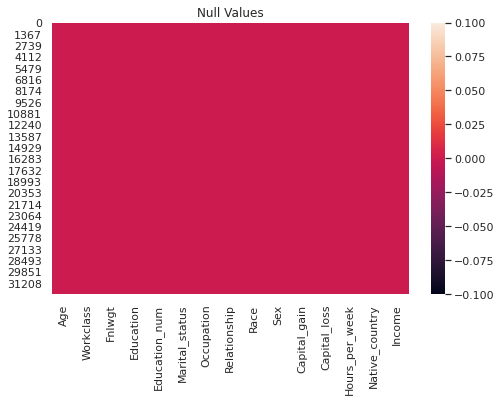

In [57]:
#plotting Null Values

plt.figure(figsize=[8,5])
sns.heatmap(Cen.isnull())
plt.title("Null Values")
plt.show()

**Observation :**

This is a very clean Dataset .

**2.Checking for Outliers**

Age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Workclass          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fnlwgt             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education_num        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Marital_status    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Occupation        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Relationship      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Race                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
Sex               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Capital_gain      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Capital_loss      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Hours_per_week          AxesSubplot(0.125,0.125;0.168478x0.16413)
Native_country       AxesSubplot(0.327174,0.125;0.168478x0.16413)
Income               AxesSubplot(0.529348,0.125;0.168478x0.16413)
dtype: obj

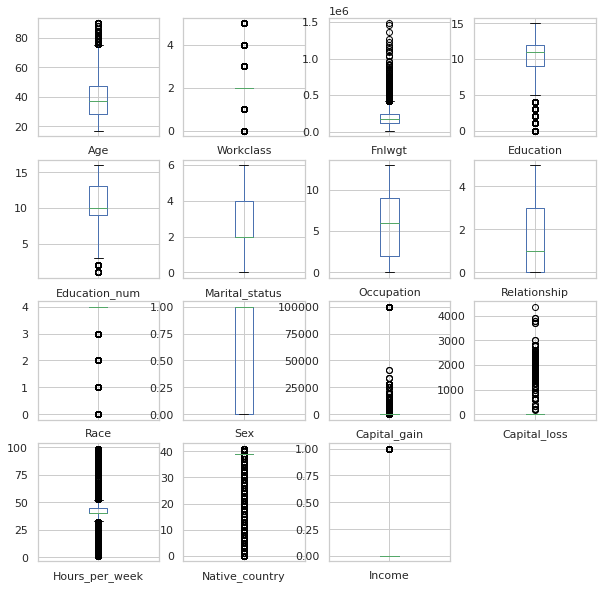

In [58]:
#Plotting Outliers
Cen.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

In [59]:
# Compute Outliers using zscore method

from scipy.stats import zscore
z=np.abs(zscore(Cen))

new_Cen = Cen[(z<3).all(axis=1)]

In [60]:
Cen.shape

(30703, 15)

In [61]:
new_Cen.shape

(25798, 15)

In [62]:
((32560-27417)/32560)*100

15.795454545454547

**Observation :**

There will be a loss of 15.79% , which would huge loss to our data and we dont want to loose more than 7% of Data. Hence we should leave the data as it is .

**3.Checking Skewness**

In [63]:
Cen.skew()

Age                0.531751
Workclass          1.141932
Fnlwgt             1.457377
Education         -0.941489
Education_num     -0.310462
Marital_status    -0.010331
Occupation         0.106606
Relationship       0.822979
Race              -2.456161
Sex               -0.755795
Capital_gain      11.783195
Capital_loss       4.513070
Hours_per_week     0.332838
Native_country    -3.642344
Income             1.159931
dtype: float64

**Observation :**
There is skewness present in most of the columns . So lets remove it .

In [64]:
#Using PowerTransformer to remove skewness

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson') ##using yeo-johnson method due to presence of negative skewness
for i in Cen.skew().index[1:]:
    if Cen.skew().loc[i]>0.55:
        Cen[i]=pt.fit_transform(Cen[i].values.reshape(-1,1))
    if Cen.skew().loc[i]<-0.55:
        Cen[i]=pt.fit_transform(Cen[i].values.reshape(-1,1))
    else:
        Cen[i]=Cen[i]

Removing Irrelevant Columns

In [65]:
Cen = Cen.drop('Education',axis=1) # Dropping Education column because we have Education_num is already present in the Dataset.

**Splitting Data and Target**

In [66]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the Income of the Census Income Project , we will drop the ‘Income’ column.

X = Cen.drop('Income',axis=1)
y = Cen['Income'].astype('int')

In [67]:
X.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,1.772804,-1.093028,13,2,3,-1.080939,0.409691,0.691136,-0.30327,-0.223523,13,0.329985
1,38,-0.132332,0.398420,9,0,5,0.169101,0.409691,0.691136,-0.30327,-0.223523,40,0.329985
2,53,-0.132332,0.562429,7,2,5,-1.080939,-2.450587,0.691136,-0.30327,-0.223523,40,0.329985
3,28,-0.132332,1.341071,13,2,9,1.552455,-2.450587,-1.446894,-0.30327,-0.223523,40,-3.213357
4,37,-0.132332,0.957512,14,2,3,1.552455,0.409691,-1.446894,-0.30327,-0.223523,40,0.329985


In [68]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 30703, dtype: int64

**Scalling of Data**

In [69]:
#Scale the Data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [70]:
X

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.881652,1.772804,-1.093028,1.119653,-0.389732,-0.737249,-1.080939,0.409691,0.691136,-0.303270,-0.223523,-2.333022,0.329985
1,-0.033503,-0.132332,0.398420,-0.441222,-1.726856,-0.240475,0.169101,0.409691,0.691136,-0.303270,-0.223523,-0.079548,0.329985
2,1.110441,-0.132332,0.562429,-1.221659,-0.389732,-0.240475,-1.080939,-2.450587,0.691136,-0.303270,-0.223523,-0.079548,0.329985
3,-0.796132,-0.132332,1.341071,1.119653,-0.389732,0.753073,1.552455,-2.450587,-1.446894,-0.303270,-0.223523,-0.079548,-3.213357
4,-0.109766,-0.132332,0.957512,1.509871,-0.389732,-0.737249,1.552455,0.409691,-1.446894,-0.303270,-0.223523,-0.079548,0.329985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30698,-0.872395,-0.132332,0.746856,0.729434,-0.389732,1.498234,1.552455,0.409691,-1.446894,-0.303270,-0.223523,-0.246472,0.329985
30699,0.119023,-0.132332,-0.194535,-0.441222,-0.389732,0.007912,-1.080939,0.409691,0.691136,-0.303270,-0.223523,-0.079548,0.329985
30700,1.491756,-0.132332,-0.221039,-0.441222,2.284518,-1.482410,1.363425,0.409691,-1.446894,-0.303270,-0.223523,-0.079548,0.329985
30701,-1.253710,-0.132332,0.271169,-0.441222,0.947393,-1.482410,1.112165,0.409691,0.691136,-0.303270,-0.223523,-1.748788,0.329985


**Treating Class Imbalance**

In [71]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 0)
X_res,  y_res = sm.fit_resample(X,y)

In [72]:
X_res.shape

(46106, 13)

In [73]:
y_res.shape

(46106,)

**Finding_Best_Random_State**

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

maxScore = 0
maxRS = 0

for i in range(1,1000):
  X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=.30,random_state=i)
  DT = DecisionTreeClassifier()
  DT.fit(X_train,y_train)
  pred = DT.predict(X_test)
  acc = accuracy_score(y_test,pred)
  if acc>maxScore:
    maxScore=acc
    maxRS=i
print('best accuracy score is :',maxScore*100,'with random_state:',maxRS)    

best accuracy score is : 85.98178137651821 with random_state: 641


**Observation :**
Best random state is 641 which will used for modeling .

**Preparation of Test and Train Data**

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.30,random_state=maxRS)

# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.


**Defining a Function for plotting ROC_AUC Curve**

In [76]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# **Building Model**

In [77]:
#Importing Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

**Classification_Models**

In [78]:
#Defining all Models

LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GBR = GradientBoostingClassifier()
KN = KNeighborsClassifier()
SV = SVC()
GNB = GaussianNB()


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy on Training Set: 77.66%

 Accuracy on Testing Set:
___________________________
77.75%


Confusion_Matrix
________________
[[5317 1580]
 [1497 5438]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      6897
           1       0.77      0.78      0.78      6935

    accuracy                           0.78     13832
   macro avg       0.78      0.78      0.78     13832
weighted avg       0.78      0.78      0.78     13832



ROC_AUC Curve
_____________
ROC_AUC score : 0.7775266593972762
Plotting


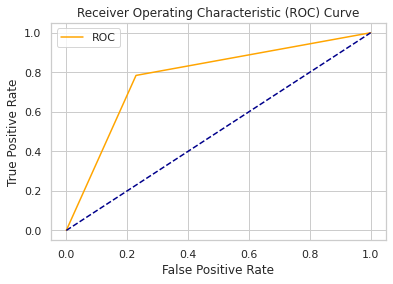



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 77.74%
Difference between accuracy_score and cross validation score is : 0.009696153629803916


------------------------------------------X---------------------------------------------


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy on Training Set: 100.0%

 Accuracy on Testing Set:
___________________________
86.04%


Confusion_Matrix
________________
[[5864 1033]
 [ 898 6037]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0      

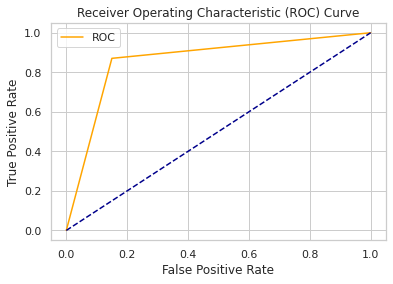



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 84.78%
Difference between accuracy_score and cross validation score is : 1.2630574804065873


------------------------------------------X---------------------------------------------


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy on Training Set: 100.0%

 Accuracy on Testing Set:
___________________________
89.85%


Confusion_Matrix
________________
[[6125  772]
 [ 632 6303]]



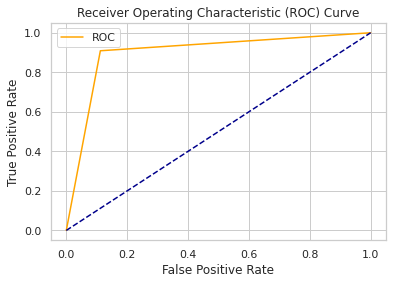



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 89.6%
Difference between accuracy_score and cross validation score is : 0.2450800491636187


------------------------------------------X---------------------------------------------


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy o

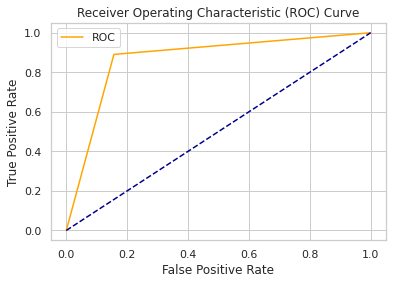



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 85.96%
Difference between accuracy_score and cross validation score is : 0.7483659064688197


------------------------------------------X---------------------------------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Accuracy on Training Set: 88.93%

 Accuracy on Testing Set:
___________________________
84.92%


Confusion_Matrix
________________
[[5325 1572]
 [ 514 6421]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      6897
           1       0.80      0.93      0.86      6935

    accuracy                           0.85     13832
   macro avg       0.86      0.85      0.85     13832
weighted avg       0.86      0.85      0.85

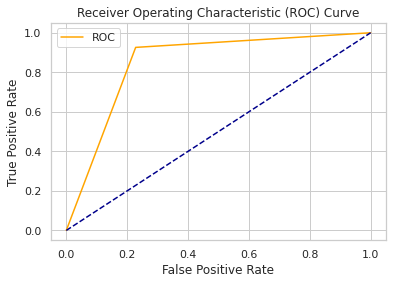



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 85.08%
Difference between accuracy_score and cross validation score is : -0.15887237455936543


------------------------------------------X---------------------------------------------


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy on Training Set: 83.0%

 Accuracy on Testing Set:
___________________________
82.61%


Confusion_Matrix
________________
[[5261 1636]
 [ 770 6165]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      6897
           1       0.79      0.89      0.84      6935

    accuracy                           0.83     13832
   macro avg       0.83      0.83

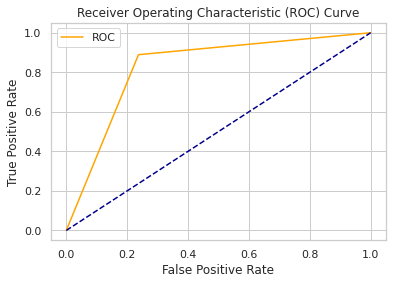



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 82.27%
Difference between accuracy_score and cross validation score is : 0.3385811837347177


------------------------------------------X---------------------------------------------


GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy on Training Set: 77.04%

 Accuracy on Testing Set:
___________________________
77.46%


Confusion_Matrix
________________
[[5264 1633]
 [1485 5450]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      6897
           1       0.77      0.79      0.78      6935

    accuracy                           0.77     13832
   macro avg       0.77      0.77      0.77     13832
weighted avg       0.77      0.77      0.77     13832



ROC_AUC Curve
_____________
ROC_AUC score : 0.7745495857837734
Plotting


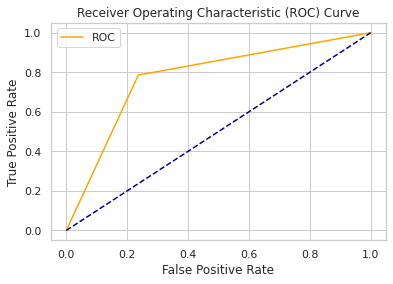



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 77.15%
Difference between accuracy_score and cross validation score is : 0.3119158304650398


------------------------------------------X---------------------------------------------




In [91]:
models = [LR,DT,RF,GBR,KN,SV,GNB]
accuracies = []

for i in models:
    print (i)
    i.fit(X_train, y_train)
    pred = i.predict(X_test)
    accuracy = accuracy_score(y_test,pred)*100
    accuracies.append(accuracy)
    print("Accuracy on Training Set: {}%".format(round(i.score(X_train, y_train)*100, 2)))
    print('\n Accuracy on Testing Set:')
    print('___________________________')
    print ("{}%".format(round(accuracy_score(y_test, pred)*100,2)))
    print('\n')
    print('Confusion_Matrix')
    print('________________')
    print (confusion_matrix(y_test, pred))
    print('\n')
    print('Classification_Report')
    print('_____________________')
    print (classification_report(y_test, pred))
    print('\n')
    print('ROC_AUC Curve')
    print('_____________')
    print('ROC_AUC score :',roc_auc_score(y_test,pred))
    print('Plotting')
    fpr, tpr, thresholds = roc_curve(y_test,pred)
    plot_roc_curve(fpr, tpr)
    print('\n')
    print('Computing Cross_Validation Score')
    print('________________________________')
    cvs = cross_val_score(i,X_res,y_res,cv=5)
    print('Cross Validation Score of the model is :',"{}%".format(round(cvs.mean()*100,2)))
    print('Difference between accuracy_score and cross validation score is :',(accuracy_score(y_test,pred)*100)-(cvs.mean()*100))
    print('\n')
    print('------------------------------------------X---------------------------------------------')
    print('\n')

**Observation :**

1. Random_Forest_Classifier has the highest accuracy score of 89.85% and Naive-bayes has the least accuracy score of 77.46% .

2. Performing cross validation we came to conclusion that Logistic Regression is the best fitted Model for our Dataset because the difference between accuracy score and cross val score is almost 0 . Hence Lets perform hyperparameter tuning on Linear Regression to get more accuracy on the Model. 


**Hyper Parameter Tuning**

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
parameter={'penalty':['l1', 'l2','elasticnet'] ,
           'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
           'solver':['liblinear', 'saga'] ,
           'max_iter':[10,100,250,500]}

In [104]:
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)

In [105]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'max_iter': [10, 100, 250, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'

In [118]:
GCV.best_params_

{'C': 0.001,
 'class_weight': {0: 0.5, 1: 0.5},
 'max_iter': 10,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [111]:
Final_mod = LogisticRegression(C = 0.001,class_weight = {0: 0.5, 1: 0.5}, penalty = 'l2', solver = 'liblinear',max_iter = 10)
Final_mod.fit(X_train,y_train)
pred_final=Final_mod.predict(X_test)
acc_final=accuracy_score(y_test,pred_final)
print('Final_Accuracy is :')
print('___________________')
print("{}%".format(round(acc_final*100,2)))

Final_Accuracy is :
___________________
78.07%


**Our Model Logistic Regression Learnt Almost 78% Accuracy.**

In [110]:
#Checking Cross_Validation Score
print('Croos-Validation score of LogisticRegression Classifier is: {}%'.format(round(cross_val_score(Final_mod,X_res,y_res,cv=5).mean()*100,2)))

Croos-Validation score of LogisticRegression Classifier is: 77.97%


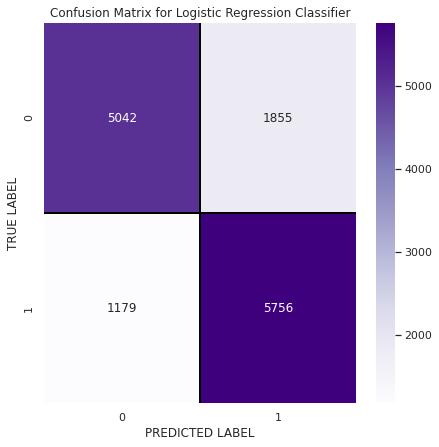

In [112]:
#Plotting Confusion Matrix of the best fitted model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred_final)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()


ROC_AUC Score of the Model is : 0.7805176362166597


         ROC_AUC CURVE OF Logistic_Regression Classifier
         _______________________________________


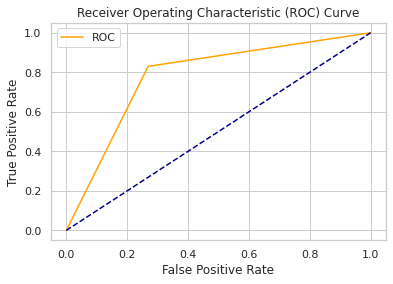

In [114]:
#Plotting ROC_AUC Curve

print('\nROC_AUC Score of the Model is :',roc_auc_score(y_test,pred_final))
print('\n')
print('         ROC_AUC CURVE OF Logistic_Regression Classifier')
print('         _______________________________________')
fpr, tpr, thresholds = roc_curve(y_test,pred_final)
plot_roc_curve(fpr, tpr)

In [115]:
#Making Final Prediction of our Model 

Prediction = pd.DataFrame([Final_mod.predict(X_test)[:],pred[:]],index=['Predicted_Data','Original_Data'])
Prediction

,0,1,2,3,4,5,6,7,...,13824,13825,13826,13827,13828,13829,13830,13831
Predicted_Data,1,1,0,0,1,0,1,0,...,1,1,1,1,0,0,1,0
Original_Data,1,0,0,0,1,0,1,1,...,1,1,1,1,1,0,1,1


# **Saving Final Model**

In [116]:
# Saving the Predicted values in csv file

Prediction.to_csv('Census.csv')

In [120]:
# Dumping Data in pickle file.

import joblib
joblib.dump(Final_mod,'Census_Income_Project.pkl')

['Census_Income_Project.pkl']